As subscription services grow more and more, service providers are not only concerned about attracting more customers to join their programs, they are also concerned about how to make their customers stay. Because sometimes it is more expensive to lose an existing customer than getting a new one. Hence, knowing which customers are more likely to leave gives service providers the opportunity to take actions in advance.
In this project I am going to build supervised learning models to predict churn with telecom customer churn dataset. This dataset can be downloaded on kaggle.com. The goal is to build a model that successfully identify which customers will churn -- this means that our model needs to have high precision. Also, I am interested in learning which features are more influential towards churn rate. 

This notebook will then be seperated in the following sections:
1. Data exploration
   1.1 Data Collection
   1.2 Data Visualization
2. Data Cleaning
3. Build Models
4. Model Evaluation
5. Feature selection 



# Part 1: Data Exploration

##1.1 Data Collection
Let's first load the data. 

In [3]:
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [4]:
#importing data in local
file = '~/Documents/Project/Laidata/ML/data/churn.all'
df = pd.read_csv(file)

In [5]:
#data exploration
df.head()



,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [6]:
print('Number of rows '+str(df.shape[0]))
print('Number of columns ' + str(df.shape[1]))
print(df.dtypes)

Number of rows 5000
Number of columns 21
state                             object
account_length                     int64
area_code                          int64
phone_number                      object
intl_plan                         object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churned                           object
dtype: object


In [7]:
#remove extra white space
# print (df['voice_mail_plan'][0])
df['voice_mail_plan'] = df['voice_mail_plan'].map(lambda x: x.strip())
# print (df['voice_mail_plan'][0])

# print(df['intl_plan'][0])
df['intl_plan']= df['intl_plan'].map(lambda x: x.strip())

# print(df['churned'][0])
df['churned'] =df['churned'].map(lambda x:x.strip())

# print(df['phone_number'][0])
df['phone_number'] = df['phone_number'].map(lambda x:x.strip())

df['state']= df['state'].map(lambda x: x.strip())

From the first look at the data, we see that there are 20 features and one churned column in "True" or "False". 
Let's visualize feature columns and take a look at their distributions next. 

##1.2 Data Visualization

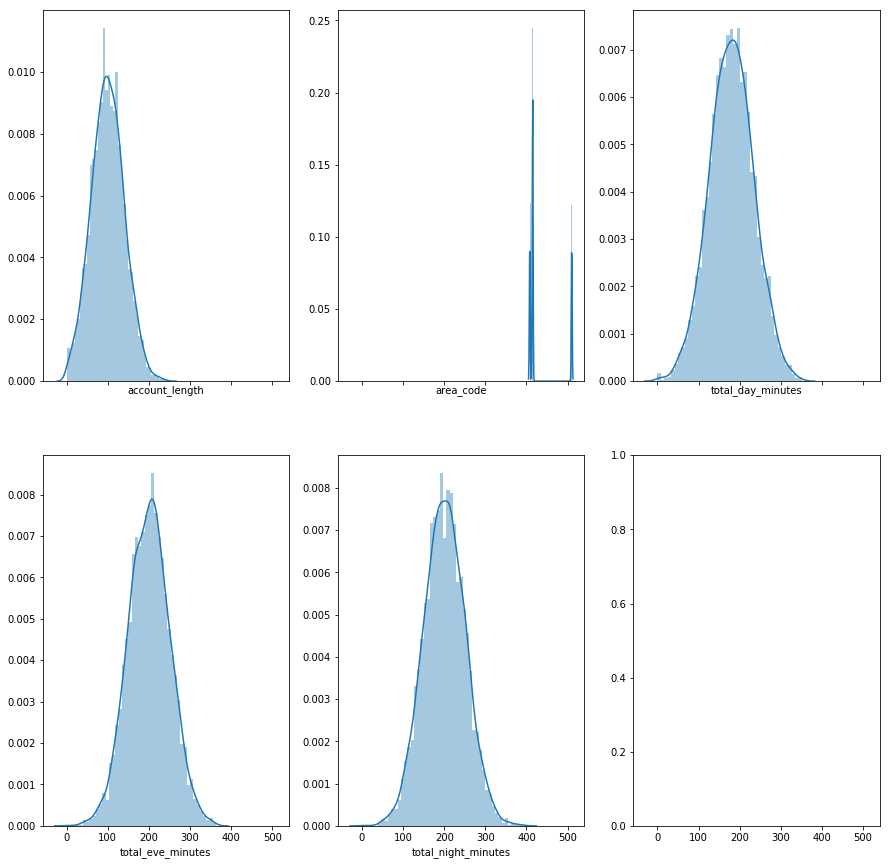

In [6]:
f, axes = plt.subplots(2, 3, figsize=(15, 15), sharex=True)
sns.distplot(df['account_length'],ax = axes[0,0])
sns.distplot(df['area_code'],ax = axes[0,1])

sns.distplot(df['total_day_minutes'],ax= axes[0,2])


sns.distplot(df['total_eve_minutes'],ax = axes[1,0])



sns.distplot(df['total_night_minutes'],ax = axes[1,1])



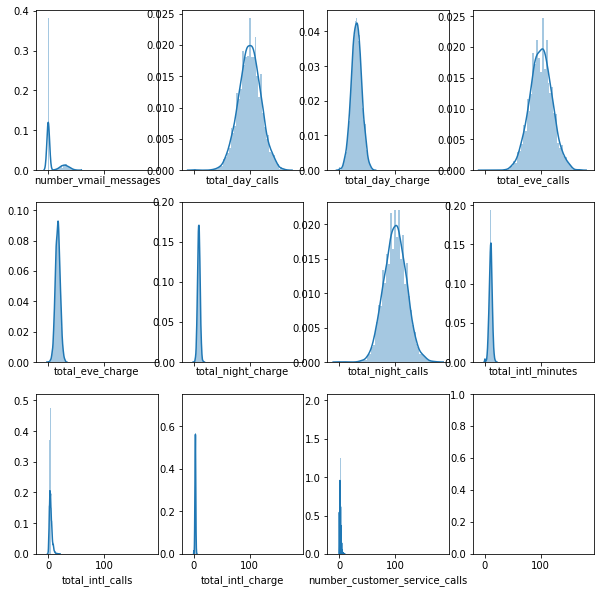

In [7]:
f, axes = plt.subplots(3, 4, figsize=(10, 10), sharex=True)
sns.distplot(df['number_vmail_messages'],ax = axes[0,0])
sns.distplot(df['total_day_calls'],ax=axes[0,1])
sns.distplot(df['total_day_charge'],ax = axes[0,2])
sns.distplot(df['total_eve_calls'],ax = axes[0,3])
sns.distplot(df['total_eve_charge'],ax = axes[1,0])
sns.distplot(df['total_night_charge'],ax = axes[1,1])
sns.distplot(df['total_night_calls'],ax = axes[1,2])
sns.distplot(df['total_intl_minutes'],ax = axes[1,3])
sns.distplot(df['total_intl_calls'],ax = axes[2,0])
sns.distplot(df['total_intl_charge'],ax = axes[2,1])
sns.distplot(df['number_customer_service_calls'],ax = axes[2,2])



#Check overview of dataframe

In [8]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

Number of variables,21
Number of observations,5000
Total Missing (%),0.0%
Total size in memory,820.4 KiB
Average record size in memory,168.0 B
Numeric,12
Categorical,4
Boolean,0
Date,0
Text (Unique),1
Rejected,4


  Here we see some mistakes made by pandas-profiling. area_code should be categorical in this case. We see some interesting facts:
  1. Churned ratio is quite low, we have true/false churned ratio of 707/(707+4293), about 14%
  2. We also see that not a lot of people suscribe to international plan. subscribtion rate is about 10%.
  3. 73.6% people have 0 voicemail messages. As a result the feature 'number_vmail_messages might not be entirely useful.
  4. 26.46% people have the voice mail plan.
  
  
  
  
  
  
#Geographic Exploration
  Next we want to look at how geographic is affecting churned rate. And maybe we'll explore habits of people from different areas. 
  First I want to count how many people churned in each state. Let's change 'True'/'False' expressions to 1 and 0
  
  

In [9]:
import plotly 
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='holllllai', api_key='W5GszAxuxygIRkdDrPIa')


In [11]:
df['churned'] = np.where(df['churned'] == 'True.',1,0)
df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Since some state counts are higher than others, we are only going to calculate churned rate in each state.

In [12]:
sum_by_state = df.groupby('state').sum()[['churned']]


count_by_state = df.groupby('state').count()[['churned']]

df_map = pd.concat([sum_by_state,count_by_state],axis = 1)
df_map = df_map.reset_index()
df_map.columns = ['state','churned','total']
df_map['ratio'] = df_map['churned']/df_map['total']
df_map

,state,churned,total,ratio
0,AK,5,72,0.069444
1,AL,13,124,0.104839
2,AR,16,92,0.173913
3,AZ,9,89,0.101124
4,CA,14,52,0.269231
5,CO,11,96,0.114583
6,CT,16,99,0.161616
7,DC,9,88,0.102273
8,DE,15,94,0.159574
9,FL,12,90,0.133333


In [12]:
for col in df_map.columns:
    df_map[col] = df_map[col].astype(str)
scl = [
    [0.0, 'rgb(242,240,247)'],
    [0.2, 'rgb(218,218,235)'],
    [0.4, 'rgb(188,189,220)'],
    [0.6, 'rgb(158,154,200)'],
    [0.8, 'rgb(117,107,177)'],
    [1.0, 'rgb(84,39,143)']
]


data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = df_map['state'],
    z = df_map['ratio'].astype(float),
    locationmode = 'USA-states',
    
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Ratio")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'Churned Ratio by State'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'churned_ratio_map')

So we see that CA people have the highest churned ratio of 26.9%, followed by 0.25% in NJ, 0.24% in WA, and 0.22% in TX. 


#Part 2: Data Cleaning  

To determine which features we should keep in the model, let's find out the correlation between feature and churned. 


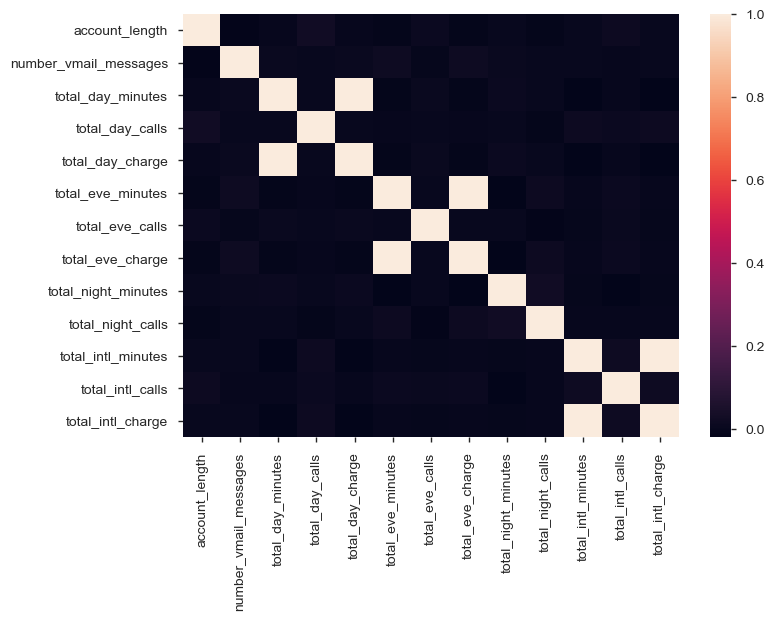

In [9]:
corr = df[["churned","account_length", "number_vmail_messages", "total_day_minutes",
                    "total_day_calls", "total_day_charge", "total_eve_minutes",
                    "total_eve_calls", "total_eve_charge", "total_night_minutes",
                    "total_night_calls", "total_intl_minutes", "total_intl_calls",
                    "total_intl_charge"]].corr()

# show heapmap of correlations
sns.heatmap(corr)

We see that some features are highly correlated. Such as total_day_charge/total_day_minutes, total_eve_charge/total_eve_minutes, total_intl_charge/total_intl_minutes. And this makes sense because the more you call the more you have to pay! 

From distribution graphs we see that day_call and night_call are pretty similar. However day_charge are centered to the right of night_charge. Does that mean that people get charged more in the day time than the night time?

Also from the correlation graph we see that day calls are more correlated to churned compared to night calls. This is interesting! 


Next, We also want to see categorical feature correlation with churned. So now we want to find a way to encode these categorical features. 

Like said before, area-code and phone-number are not gonna be very useful for prediction. So I will drop them. Try use one hot encoding for state variable. And check what's the rate of total churned. 

In [13]:
to_drop = ['area_code','phone_number','churned']
y = df['churned']
churn_feat_space = df.drop(to_drop, axis=1)

# yes and no have to be converted to boolean values
yes_no_cols = ["intl_plan","voice_mail_plan"]
churn_feat_space[yes_no_cols] = churn_feat_space[yes_no_cols] == 'yes'

churn_feat_space= pd.get_dummies(churn_feat_space, columns= ['state'])
X = churn_feat_space

# check the propotion of y = 1
print(y.sum() / y.shape * 100)

[14.14]


The total churned percent is 14.14%. So it's not a very balanced data. 



#Preparing training and testing data. 
Since we don't have a very large dataset, we'll reserve 20% data as test data. (Note, we might want a validation set later. Let's keep this for experiment)

In [70]:
# Splite data into training and testing
from sklearn import model_selection

# Reserve 20% for testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

print('training data has %d observation with %d features'% X_train.shape)
print('test data has %d observation with %d features'% X_test.shape)

training data has 4000 observation with 68 features
test data has 1000 observation with 68 features


In [71]:
# Scale the data, using standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Part 3: Build model 

After extracting training data and testing data, I will test out a few machine learning models to fit the training model. Then I will use 5-fold cross validation on these models to check model accuracy. 

In [72]:
#@title build models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from xgboost import XGBClassifier
# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

#SVM 
classifier_SVC = SVC()
#XGBoost
classifier_xgboost = XGBClassifier()

In [74]:
# Use 5-fold Cross Validation to get the accuracy for different models
model_names = ['Logistic Regression','KNN','Random Forest','SVM','xgboost']
model_list = [classifier_logistic, classifier_KNN, classifier_RF,classifier_SVC,classifier_xgboost]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    # cprint(cv_score)
    print('Model accuracy of %s is: %.3f'%(model_names[count],cv_score.mean()))
    count += 1

Model accuracy of Logistic Regression is: 0.864
Model accuracy of KNN is: 0.879
Model accuracy of Random Forest is: 0.932
Model accuracy of SVM is: 0.858
Model accuracy of xgboost is: 0.953


The top 3 models with best performances are xgboost, random forest, and SVM models. 
Next to improve model performance, I will use grid search to find optimal hyperparameters for these three models. 

#Part 4: Model Evaluation

Use grid search to find optimal hyperparameters
#Note to self: try random grid search 

In [28]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: %0.3f" % gs.best_score_)
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Grid Search for Logistic Regression: 

In [29]:
# Possible hyperparamter options for Logistic Regression Regularization
# Penalty is choosed from L1 or L2
# C is the lambda value(weight) for L1 and L2
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(1, 5, 10)
}
Grid_LR = GridSearchCV(LogisticRegression(),parameters, cv=5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ('l1', 'l2'), 'C': (1, 5, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [30]:
# the best hyperparameter combination
print_grid_search_metrics(Grid_LR)

Best score: 0.862
Best parameters set:
	C: 1
	penalty: 'l2'


In [42]:
best_LR_model = Grid_LR.best_estimator_

Grid Search for KNN:

In [31]:
#possible hyperparameter options for KNN
parameters= {'n_neighbors':[3,5,6,7,8,10]}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters,cv = 5)
Grid_KNN.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [3, 5, 6, 7, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [32]:
print_grid_search_metrics(Grid_KNN)

Best score: 0.862
Best parameters set:
	n_neighbors: 6


In [43]:
best_KNN_model = Grid_KNN.best_estimator_

Grid Search for Random Forest: 

In [33]:
#possible hyperparameters options for random forest
parameters = {'n_estimators':[60,70,80]}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters,cv = 5)
Grid_RF.fit(X_train,y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [60, 70, 80]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [34]:
print_grid_search_metrics(Grid_RF)

Best score: 0.946
Best parameters set:
	n_estimators: 70


In [44]:
best_RF_model = Grid_RF.best_estimator_

Grid Search for SVM:

In [40]:
parameters = {'C':[0.01,0.1,1,10,100]}
Grid_SVM = GridSearchCV(SVC(),parameters,cv = 5)
Grid_SVM.fit(X_train,y_train)



GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [41]:
print_grid_search_metrics(Grid_SVM)

Best score: 0.890
Best parameters set:
	C: 10


In [45]:
best_SVM_model = Grid_SVM.best_estimator_

Grid Search for XGBoost:

In [38]:
parameters = {'max_depth':(5,10,15,20),
             'learning_rate':(0.1, 0.05),
             'n_estimators':(70,80,90)}
Grid_XGBoost = GridSearchCV(XGBClassifier(),parameters,cv = 5)
Grid_XGBoost.fit(X_train,y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': (5, 10, 15, 20), 'learning_rate': (0.1, 0.05), 'n_estimators': (70, 80, 90)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [39]:
print_grid_search_metrics(Grid_XGBoost)

Best score: 0.959
Best parameters set:
	learning_rate: 0.05
	max_depth: 15
	n_estimators: 90


In [46]:
best_XGB_model = Grid_XGBoost.best_estimator_

#Model Evaluation

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#caculate accuracy, precision and recall
def cal_evaluation(classifier,cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy = (tp + tn)/(tp+tn+fp+fn+0.0)
    precision = tp/(tp+fp+0.0)
    recall = tp/(tp+fn+0.0) #figure out why recall function is like this 
    print (classifier)
    print('Accuracy is: %0.3f' %accuracy)
    print('Precision is: %0.3f' %precision)
    print('Recall is: %0.3f' %recall) #%0.3f的意思是小数点后3位数
    
    
#draw confusion matrices
def draw_cms(cms):
    class_names = ['not churn','churn']
    for cm in cms:
        classifier, cm = cm[0],cm[1] 
        cal_evaluation(classifier,cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm,interpolation = 'nearest', cmap = plt.get_cmap('Reds'))
        plt.title('Confusion matrix for %s' %classifier)
        fig.colorbar(cax)
        ax.set_xticklabels(['']+class_names)
        ax.set_yticklabels(['']+class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
        

Logistic Regression
Accuracy is: 0.868
Precision is: 0.571
Recall is: 0.229


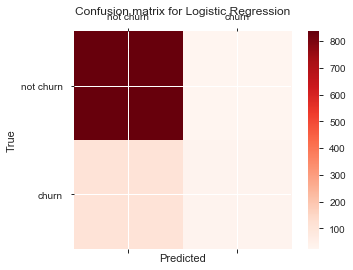

In [49]:


%matplotlib inline
confusion_matrices= [
    ('Logistic Regression',confusion_matrix(y_test,best_LR_model.predict(X_test)))]
draw_cms(confusion_matrices)

KNN
Accuracy is: 0.861
Precision is: 0.667
Recall is: 0.014


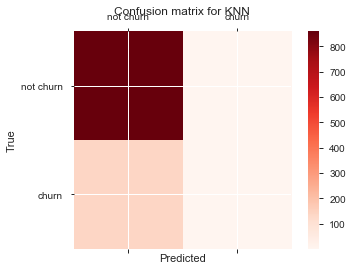

In [50]:
confusion_matrices=[('KNN',confusion_matrix(y_test,best_KNN_model.predict(X_test)))]
draw_cms(confusion_matrices)

SVM
Accuracy is: 0.903
Precision is: 0.701
Recall is: 0.536


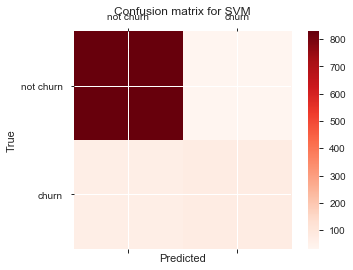

In [51]:
confusion_matrices=[('SVM',confusion_matrix(y_test,best_SVM_model.predict(X_test)))]
draw_cms(confusion_matrices)

Random Forest
Accuracy is: 0.952
Precision is: 0.960
Recall is: 0.686


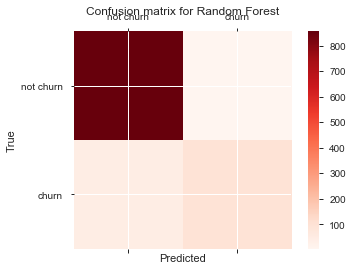

In [52]:
confusion_matrices=[('Random Forest',confusion_matrix(y_test,best_RF_model.predict(X_test)))]
draw_cms(confusion_matrices)

XGBoost
Accuracy is: 0.959
Precision is: 0.938
Recall is: 0.757


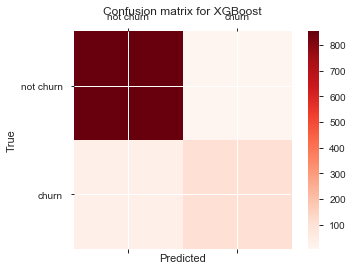

In [65]:
confusion_matrices = [('XGBoost',confusion_matrix(y_test,best_XGB_model.predict(X_test)))]
draw_cms(confusion_matrices)

#model evaluation:ROC and AUC

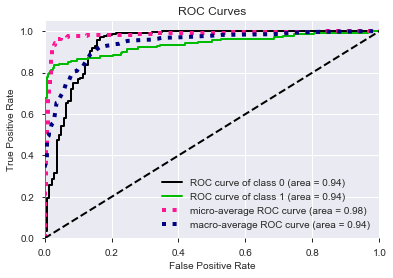

In [66]:
import scikitplot as skplt

skplt.metrics.plot_roc(y_test,best_XGB_model.predict_proba(X_test))
plt.show()

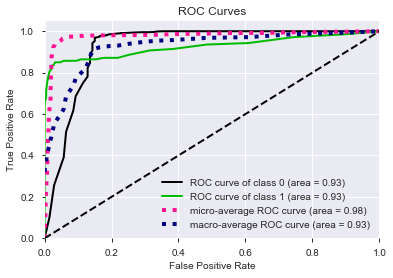

In [67]:
import scikitplot as skplt

skplt.metrics.plot_roc(y_test,best_RF_model.predict_proba(X_test))
plt.show()

After evaluating the models, we narrow down our model finalists to be random forest and XGBoost. 
In terms of accuracy performance, XGBoost is a better classifier than Random Forest. (0.959 compared with 0.952). 
On the other hand, in terms of precision, Random forest is a better classifier than XGBoost (0.96 compared with 0.938)
Keep in mind that we are more interested in precision. Therefore we will select RF as our final classifier. 

Part 5: Feature Importance


In [75]:

feature_importances = pd.DataFrame(best_RF_model.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)


In [77]:
feature_importances

,importance
total_day_charge,0.144604
total_day_minutes,0.135943
number_customer_service_calls,0.102997
intl_plan,0.068725
total_eve_minutes,0.056142
total_eve_charge,0.052624
total_intl_calls,0.043172
total_night_minutes,0.039123
total_intl_minutes,0.038873
total_intl_charge,0.038747


Finally, we see that "total_day_charge" , "total_day_minutes", "number_customer_service_calls" are the most 3 important features that influent costomer churn rate. Maybe the phone bill is too expensive, maybe the phone plan has limited phone call times, or maybe the customer service department is not doing a very good job... These all could be the reasons that your customer is leaving your plan. 